Usage:

Run step 0 on start-up

Run steps 1,2,3,4a,4b in correct order to plot graph

Steps 2.5a, 2.5b, 3.5a and 3.5b are optional for specific plots.

In [1]:
# Step 0: import
from pathlib import Path
import json

import matplotlib.pyplot as plt
import numpy as np
from math import log

In [9]:
# Step 1: load data


# loading the input file
# file_name = input("Enter the input file name: ") or "INUTIL-Trial-sample.fst"
file_name = "INUTIL-Trial-sample.fst"

path_exists = Path(file_name).is_file()

if(not path_exists) :
    print("invalid file path:" , file_name)
    exit()

else:
    fh = open(file_name, 'r')
    count = -1
    data_set = []

    #reading the file by line
    for line in fh:
        line = line.replace('\n','')
        if line != '' and line[0] == '>':
            # counting sequence number
            count +=1
            # loading information from sequence name
            split_info = line.split('_')
            patient = split_info[0]
            day = split_info[1]
            cd4 = float(split_info[2].split('/')[1])
            viral_load = float(split_info[3].split('/')[1])
            # create new sequence
            new_sequence = ''
            data_set.append([patient, day, cd4, viral_load, new_sequence])
        else:
            # adding the sequence
            data_set[count][4] += line

# print the data output of this cell:
# print(json.dumps(data_set[0:3], indent=4))

In [10]:
# Step 2: dividing data before and after treatment

before = []
after = []
for data in data_set:
    if data[1] == 'day0':
        before.append(data)
    else:
        after.append(data)

# for plot title only
cd4_title = "All patients' CD4 count before-after INUTIL treatment"
viral_count_title = "All patients' viral count before-after INUTIL treatment"

# print the data output of this cell:
# print(json.dumps(before[0:2], indent=4))

Since there are numerous observations with cd4 count dropping after treatment,
the data with low cd4 count (cd4 < 500) after treatment are selected for further plotting.

In [4]:
##### OPTIONAL #####
# Step 2.5a: sorting data with low cd4 count (cd4 < 500) after treatment

replacement_data_set = []
for i in range(0,len(before)):
    if after[i][2] < 500:
        replacement_data_set.append(before[i])
        replacement_data_set.append(after[i])

# overwriting the original data
data_set = replacement_data_set


# updating data in lists [before] and [after]:
# dividing data before and after treatment
before = []
after = []
for data in data_set:
    if data[1] == 'day0':
        before.append(data)
    else:
        after.append(data)

# for plot title only
cd4_title = "Patients' CD4 count before-after INUTIL treatment, for patients with CD4 count < 500 post-treatment"
viral_count_title = "Patients' viral count before-after INUTIL treatment, for patients with CD4 count < 500 post-treatment"

# print the data output of this cell:
# print(json.dumps(after[0:2], indent=4))

Since there are numerous observations with increased viral count after treatment,
the data with increased viral count (e^5 folds ~ 148 folds) after treatment are selected for further plotting.

In [11]:
##### OPTIONAL #####
# Step 2.5b: sorting data with increased viral count (e^5 folds ~ 148 folds) after treatment

replacement_data_set = []
for i in range(0,len(before)):
    if after[i][3] > 148*(before[i][3]) :
        replacement_data_set.append(before[i])
        replacement_data_set.append(after[i])

# overwriting the original data
data_set = replacement_data_set


# updating data in lists [before] and [after]:
# dividing data before and after treatment
before = []
after = []
for data in data_set:
    if data[1] == 'day0':
        before.append(data)
    else:
        after.append(data)

# for plot title only
cd4_title = "Patients' CD4 count before-after INUTIL treatment, for patients with viral count increased > 148 fold post-treatment"
viral_count_title = "Patients' viral count before-after INUTIL treatment, for patients with viral count increased > 148 fold post-treatment"

# print the data output of this cell:
# print(json.dumps(after[0:2], indent=4))

In [12]:
# Step 3: sorting the cd4 and viral count data for plotting
before_cd4 = [row[2] for row in before]
after_cd4 = [row[2] for row in after]
before_viral_count = [row[3] for row in before]
after_viral_count = [row[3] for row in after]

# for y label only
cd4_count_text = 'CD4 count'
viral_count_text = 'viral count'

In [79]:
##### OPTIONAL #####
# Step 3.5a: logging the cd4 data for better plot
before_cd4 = [log(x) for x in before_cd4]
after_cd4 = [log(x) for x in after_cd4]

# for y label only
cd4_count_text = 'CD4 count (ln)'

In [13]:
##### OPTIONAL #####
# Step 3.5b: logging the viral count data for better plot
before_viral_count = [log(x) for x in before_viral_count]
after_viral_count = [log(x) for x in after_viral_count]

# for y label only
viral_count_text = 'viral count (ln)'

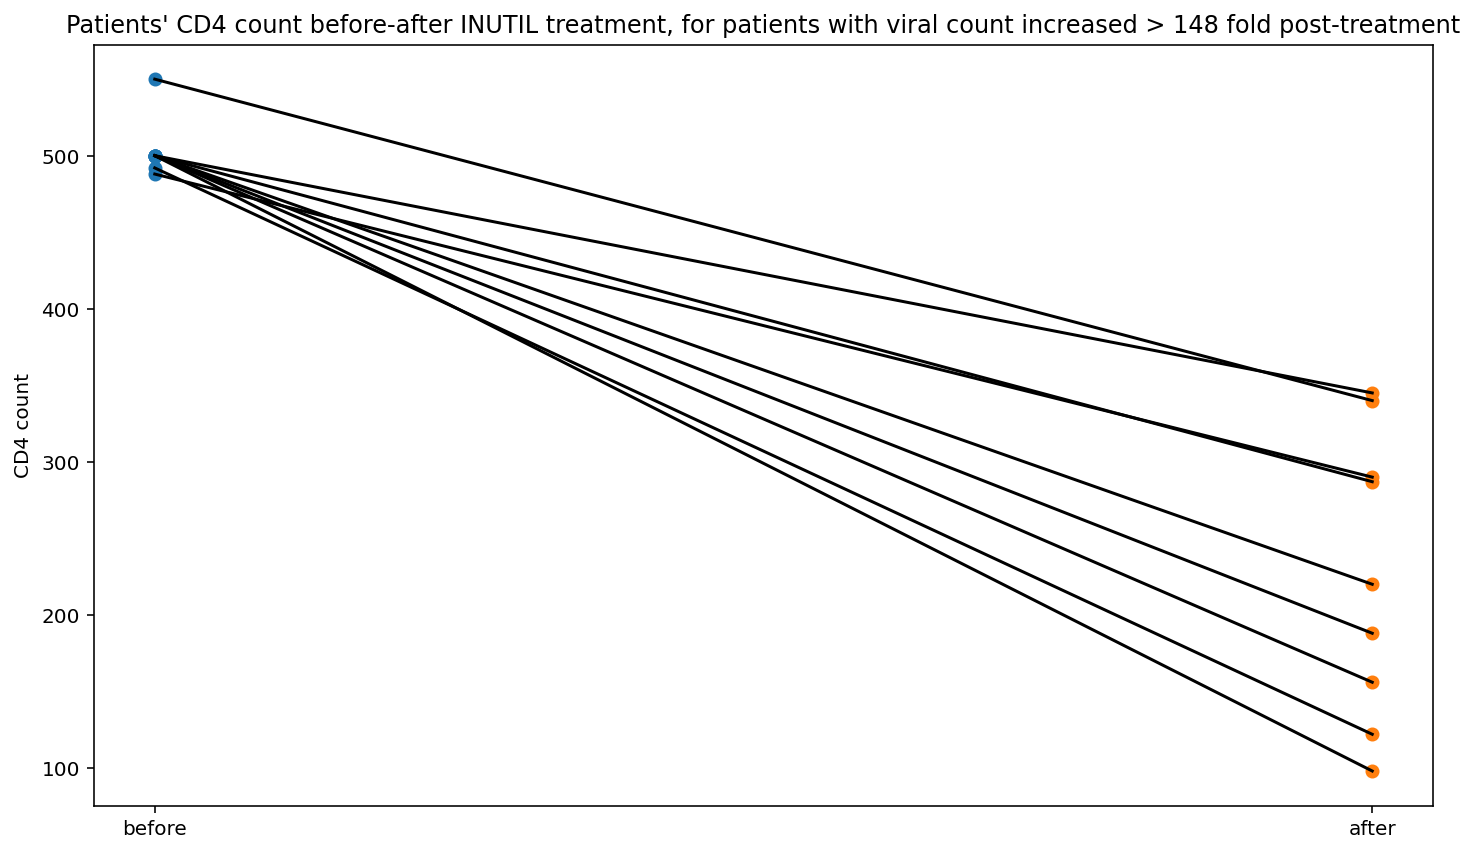

In [14]:
# Step 4a: plotting the CD4 count before-after treatment
plt.scatter(np.zeros(len(before_cd4)), before_cd4)
plt.scatter(np.ones(len(after_cd4)), after_cd4)

# drawing lines
for i in range(len(before_cd4)):
    plt.plot( [0,1], [before_cd4[i], after_cd4[i]], c='k')

plt.title(cd4_title)
plt.xticks([0,1], ['before', 'after'])
plt.ylabel(cd4_count_text)

plt.show()

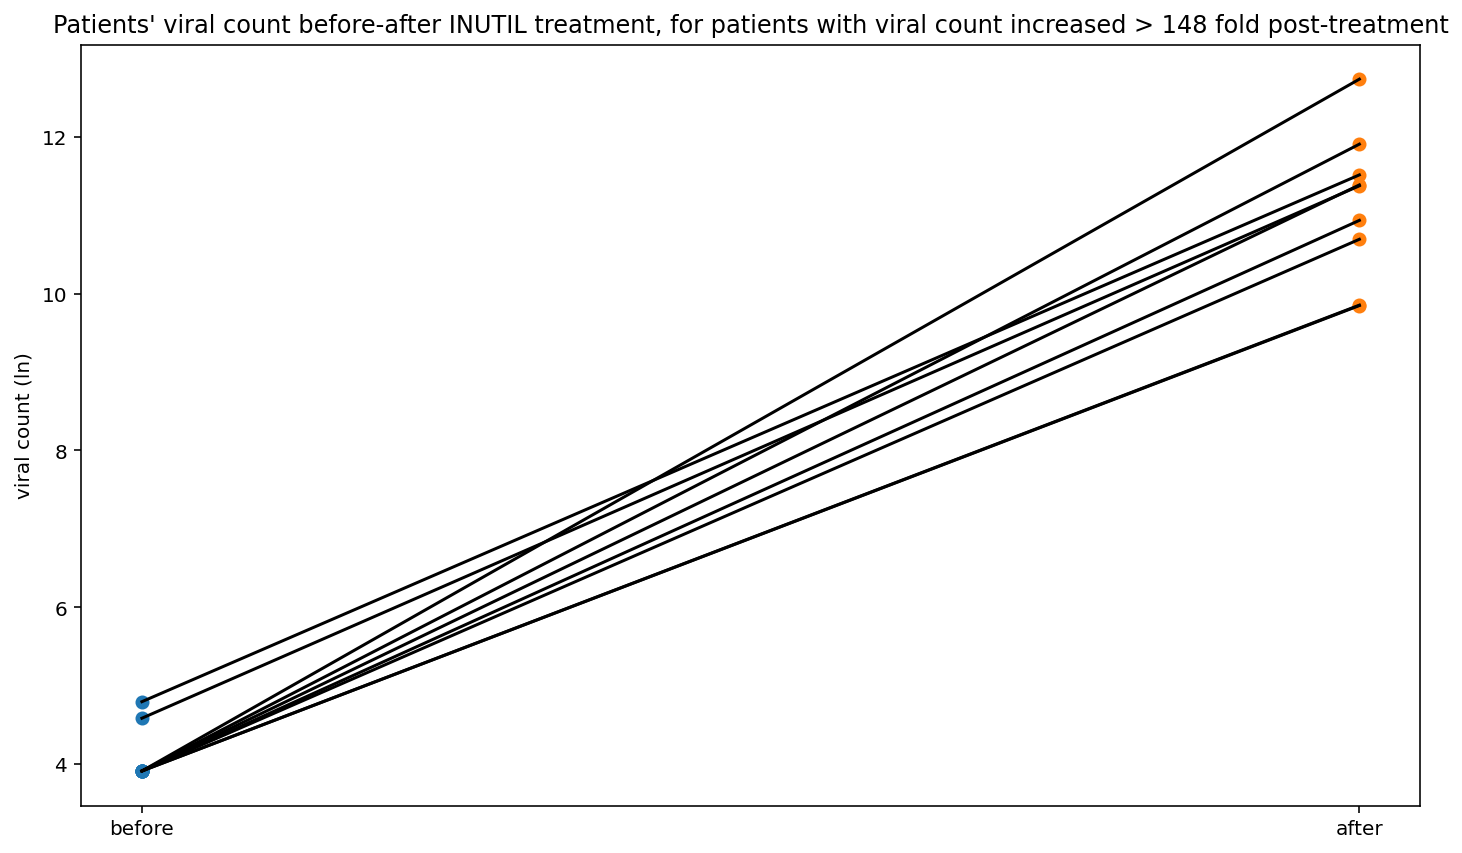

In [15]:
# Step 4b: plotting the viral count before-after treatment
plt.scatter(np.zeros(len(before_viral_count)), before_viral_count)
plt.scatter(np.ones(len(after_viral_count)), after_viral_count)

# drawing lines
for i in range(len(before_viral_count)):
    plt.plot( [0,1], [before_viral_count[i], after_viral_count[i]], c='k')

plt.title(viral_count_title)
plt.xticks([0,1], ['before', 'after'])
plt.ylabel(viral_count_text)

plt.show()

In [16]:
#a function to output the sorted data as *.fst
def export_data_as_fst(output_data, output_file):
    text_file = open(output_file+'.fst', "w")
    for data in output_data:
        # formatting for sequence name
        text_file.write(data[0] + '_' + data[1] + '_CD4/' + str(data[2]) + '_VL/' + str(data[3]) + '\n')
        # writing the sequence
        text_file.write(data[4] + '\n')
    text_file.close()

In [17]:
export_data_as_fst(before, 'INUTIL-before-data')
export_data_as_fst(after, 'INUTIL-after-data')
export_data_as_fst(data_set, 'INUTIL-data')
